In [1]:
from pyspark import SparkContext, SparkConf

#### First way to create SparkContext

In [2]:
conf = SparkConf().setAppName("Youtube_Demo").setMaster("local")
sc = SparkContext(conf=conf)

RuntimeError: Java gateway process exited before sending its port number

In [6]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.driver.host', 'DESKTOP-AI'),
 ('spark.driver.port', '56961'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'Youtube_Demo'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1596295928742'),
 ('spark.ui.showConsoleProgress', 'true')]

In [7]:
sc.stop()

#### Second way, Create a SparkContext that loads settings 

In [8]:
sc = SparkContext()

In [9]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.driver.host', 'DESKTOP-AI'),
 ('spark.app.id', 'local-1596295977088'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.port', '57019'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'Youtube_Demo'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

In [10]:
sc.stop()

In [11]:
# third way to combining both 
sc = SparkContext("local", "First App")

Rdd - Reselient Distributed Dataset
An RDD in Spark is simply an immutable distributed collections of objects. Each RDD IS split into multiple
partitions, which may be computed on different nodes of the cluster.

RDD can be created in two ways: by loading an external dataset, or by transforming one RDD into another.

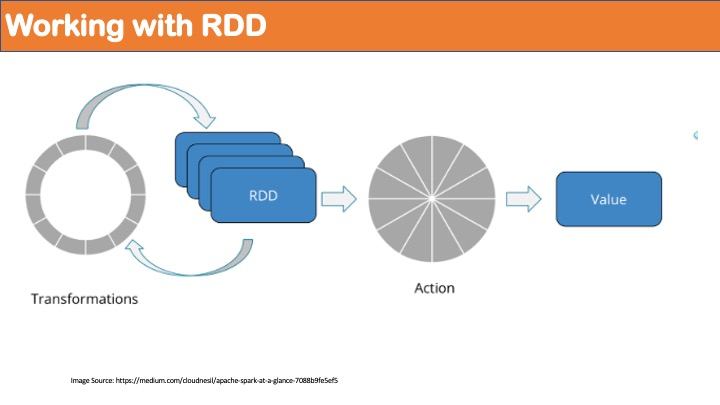

In [1]:
from IPython.display import Image
Image(filename='RDD_Intro.jpg')

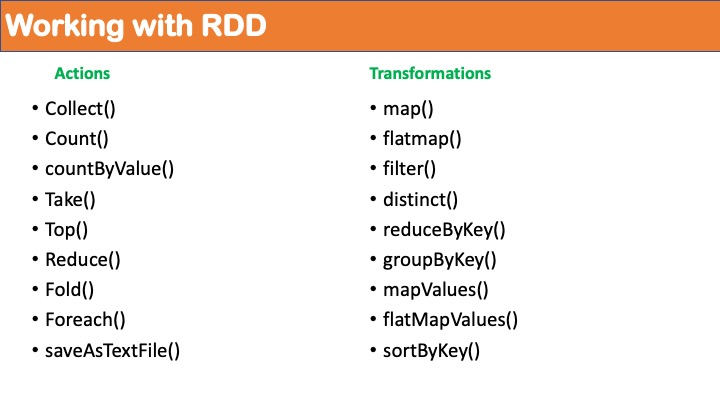

In [2]:
Image(filename='RDD_Actions_Transformations.jpg')

## Create RDD and their Basic Actions

In [12]:
names = sc.parallelize(['Adam','Cray','Shaun','Brain','Mark','Christ','Shail','Satya','Mark','Norby','Frans','Mark','Bill'])

In [13]:
type(names)

pyspark.rdd.RDD

In [17]:
names.collect()

['Adam',
 'Cray',
 'Shaun',
 'Brain',
 'Mark',
 'Christ',
 'Shail',
 'Satya',
 'Mark',
 'Norby',
 'Frans',
 'Mark',
 'Bill']

In [18]:
type(a)

list

In [19]:
names.countByValue()

defaultdict(int,
            {'Adam': 1,
             'Cray': 1,
             'Shaun': 1,
             'Brain': 1,
             'Mark': 3,
             'Christ': 1,
             'Shail': 1,
             'Satya': 1,
             'Norby': 1,
             'Frans': 1,
             'Bill': 1})

In [20]:

def f(x): print(x)
a=sc.parallelize([1, 2, 3, 4, 5]).foreach(lambda x : print(x))

In [21]:
type(a)

NoneType

In [ ]:
a=sc.parallelize([(1,2),(2,4)])

In [ ]:
a.countByValue()

In [22]:
names.collect()

['Adam',
 'Cray',
 'Shaun',
 'Brain',
 'Mark',
 'Christ',
 'Shail',
 'Satya',
 'Mark',
 'Norby',
 'Frans',
 'Mark',
 'Bill']

In [24]:
names.take(5)

['Adam', 'Cray', 'Shaun', 'Brain', 'Mark']

In [25]:
employees = sc.textFile("employees.txt")

In [26]:
type(employees)

pyspark.rdd.RDD

In [27]:
employees.collect()

['Adam',
 'Cray',
 'Shaun',
 'Brain',
 'Mark',
 'Christ',
 'Shail',
 'Satya',
 'Mark',
 'Norby',
 'Frans',
 'Mark',
 'Bill']

In [28]:
employees.first()

'Adam'

In [29]:
employees.count()

13

In [30]:
employees.top(5)

['Shaun', 'Shail', 'Satya', 'Norby', 'Mark']

In [31]:
employees.top(19)

['Shaun',
 'Shail',
 'Satya',
 'Norby',
 'Mark',
 'Mark',
 'Mark',
 'Frans',
 'Cray',
 'Christ',
 'Brain',
 'Bill',
 'Adam']

In [32]:
employees.distinct().count()

11

## Taking number example for better clarity

In [51]:
num = sc.parallelize([5,5,4,3,2,9,2],9)
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [46]:
num.take(4)

[5, 5, 4, 3]

In [34]:
num.countByValue()

defaultdict(int, {5: 2, 4: 1, 3: 1, 2: 2, 9: 1})

In [35]:
type(num)

pyspark.rdd.RDD

In [49]:
#GLOM : RDD OF TUPLES 

In [52]:
num.glom().collect()

[[], [5], [5], [4], [], [3], [2], [9], [2]]

In [54]:
type(num.glom())

pyspark.rdd.PipelinedRDD

In [55]:
num.max()

9

In [56]:
num.min()

2

In [57]:
num.mean()

4.285714285714286

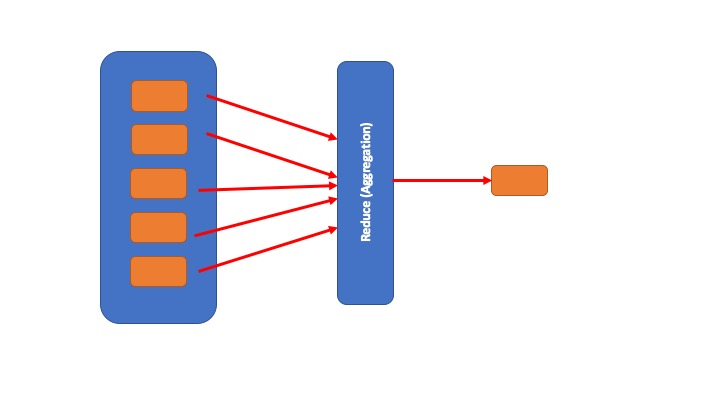

In [58]:
Image(filename='Action_Reduce.jpg')

In [59]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [60]:
num.reduce(lambda a,b: a+b)

30

In [61]:
num.reduce(lambda a,b: a*b)

10800

In [62]:
num.reduce(lambda x,y: x if x > y else y)

9

In [63]:
def myfun(a,b):
    return a*2 + b*2

In [64]:
num.reduce(myfun)

872

In [65]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [66]:
num.takeOrdered(3)

[2, 2, 3]

In [ ]:
# fold: the initial value for the accumulated result of each partition for the op operator, 
# and also the initial value for the combine results from different partitions

In [136]:
num = sc.parallelize([5,5,4,3,2,9,2],2)
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [137]:
num.glom().collect()

[[5, 5, 4], [3, 2, 9, 2]]

In [138]:
num.reduce(lambda a,b: a+b)

30

In [130]:
num.reduce(lambda a,b: a*b)

10800

In [127]:
num.fold(2,lambda a,b:a+b)

34

In [139]:
num.fold(2,lambda a,b : a*b )

86400

In [140]:
from operator import add
b=sc.parallelize([1, 2, 3, 4, 5])
b.fold(1, add)


17

In [141]:
from operator import add,mul
num3 = sc.parallelize([5,5,4,3,2,9,2]).fold(10,mul)
num3

1080000

In [150]:
b = sc.parallelize(range(1,10))

In [151]:
b.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]